# L1 and L2 Regularization with Linear Regression
Using the [Climate Change Temperature](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data) dataset from Kaggle, our goal is to implement L1 and L2 Normalization to regularize a linear model, and make a comparison between the performance of L1 and L2. Through this implementation, we get to examine the three ways vectors are used in machine learning - to represent input data, represent our model weights and regularize our model.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Preparation

In [2]:
# Importing csv dataset with pandas
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

# Extrating year and month from data
data['year'] = pd.DatetimeIndex(pd.to_datetime(data['dt'])).year
data['month'] = pd.DatetimeIndex(pd.to_datetime(data['dt'])).month

# Using only temp data for Los Angeles in October
data = data.loc[data['City'] == 'Los Angeles']
data = data.loc[data['month'] == 10]

# Looking at the first 5 rows of dataset
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
131855,1849-10-01,16.549,2.177,Los Angeles,United States,34.56N,118.70W,1849,10
131867,1850-10-01,17.577,1.318,Los Angeles,United States,34.56N,118.70W,1850,10
131879,1851-10-01,16.963,2.856,Los Angeles,United States,34.56N,118.70W,1851,10
131891,1852-10-01,15.792,1.630,Los Angeles,United States,34.56N,118.70W,1852,10
131903,1853-10-01,17.851,3.069,Los Angeles,United States,34.56N,118.70W,1853,10


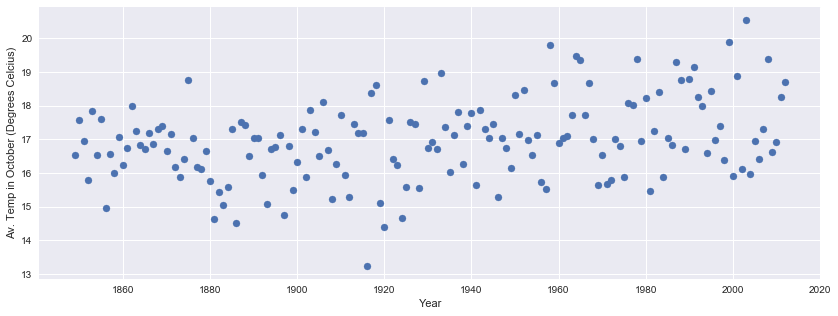

In [3]:
# Using Year as X_values and price as Y_values, we want to predict the temperature
# in LA in a future year
points = data.as_matrix(['year', 'AverageTemperature'])

# Looking at the plot of the points, we can see a linear trend 
f, ax = plt.subplots(figsize=(14, 5))
ax.set_xlabel('Year')
ax.set_ylabel('Av. Temp in October (Degrees Celcius)')
plt.scatter(points[:,0], points[:,1])
plt.show()

## Linear Regression and Gradient Descent
In Linear Regression, our goal is to find the parameters that minimises the mean sum of squared error function:

$$
E(m,b) =  \frac{1}{2N} \sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2
$$

Regularization is a very important technique in machine learning to prevent overfitting and ensure that the model generalizes well to new data. Generally, there are two forms of regularization - L1 and L2. 

### With L1 Regularization:

$$
E(m,b) =  \frac{1}{2N} \big(\sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2 + \lambda \parallel m \parallel\big)
$$

$$
\frac{d}{db} = \frac{1}{N} \sum_{i=1}^n -\big(y_i - (m x_i + b )\big)
$$

$$
\frac{d}{dm} = \frac{\lambda}{2N} + \frac{1}{N} \sum_{i=1}^n -x_i\big(y_i - (m x_i + b )\big)
$$


### With L2 Regularization:

$$
E(m,b) =  \frac{1}{2N} \big(\sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2 + \lambda \parallel m \parallel^2\big)
$$

$$
\frac{d}{db} = \frac{1}{N} \sum_{i=1}^n -\big(y_i - (m x_i + b )\big)
$$

$$
\frac{d}{dm} = \frac{\lambda}{N} m + \frac{1}{N} \sum_{i=1}^n -x_i\big(y_i - (m x_i + b )\big)
$$


As it can be observed, the partial derivative with respect to b does not vary with regularization.

In [4]:
# Computes mean sum of squared error for all data points
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [5]:
def step_gradient(b_current, m_current, points, learningRate, lam, regularizer):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    
    # Iterating over all points
    for i in range(0, len(points)):
        # Getting x and y values
        x = points[i, 0]
        y = points[i, 1]
        
        # Calculating gradients according to regularization
        if regularizer == 'L1':
            m_gradient += (lam/(2*N) -(x/N) * (y - ((m_current * x) + b_current)))
        elif regularizer == 'L2':
            m_gradient += (lam/N*m_current - (x/N) * (y - ((m_current * x) + b_current)))
        else:
            m_gradient += -(x/N) * (y - ((m_current * x) + b_current))
        b_gradient += -(1/N) * (y - ((m_current * x) + b_current))
        
    # Updating b and m with learningrate * gradients
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [6]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations, lam, regularizer):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate, lam, regularizer)
        # Every 100 iterations, prints b and m and error
        if i % 100 == 0:
            print('Iteration {}, b:{}, m:{}, error:{}'.format(i, b, m, compute_error_for_line_given_points(b, m, points)))
    return [b, m]

def run(lr, num_iter, lam, regularizer=None):
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iter
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations, lam, regularizer)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    return b, m

# Predicts y, given x
def predict(b, m, x_values):
    predicted_y = list()
    for x in x_values:
        y = m * x + b
        predicted_y.append(y)
    return predicted_y

In [7]:
# Hyperparameters
learning_rate = 0.0000001
iterations = 500
lamb = 500

# Linear Regression with L1 
b1, m1 = run(learning_rate, iterations, lamb, 'L1')

# Linear Regression with L2 
b2, m2 = run(learning_rate, iterations, lamb, 'L2')

# Linear Regression without Regularization
b3, m3 = run(learning_rate, iterations, lamb)

Starting gradient descent at b = 0, m = 0, error = 289.596072
Running...
Iteration 0, b:1.6974890243902432e-06, m:0.003253853606707318, error:115.69962354906068
Iteration 100, b:5.830591196204104e-06, m:0.008725637166902842, error:1.3136946086406749
Iteration 200, b:7.131009818388362e-06, m:0.00872563649369018, error:1.3136946070291962
Iteration 300, b:8.431428432756832e-06, m:0.008725635820477522, error:1.3136946054177188
Iteration 400, b:9.731847039309517e-06, m:0.008725635147264868, error:1.3136946038062456
After 500 iterations b = 1.1019261452097737e-05, m = 0.008725634480784346, error = 1.3136946022108869
Starting gradient descent at b = 0, m = 0, error = 289.596072
Running...
Iteration 0, b:1.6974890243902432e-06, m:0.0032788536067073167, error:114.66922021674188
Iteration 100, b:4.579896115606634e-06, m:0.008791499835056749, error:1.2969395965805244
Iteration 200, b:4.608848439793993e-06, m:0.008791499820070454, error:1.2969395965446284
Iteration 300, b:4.637800763768552e-06, m:

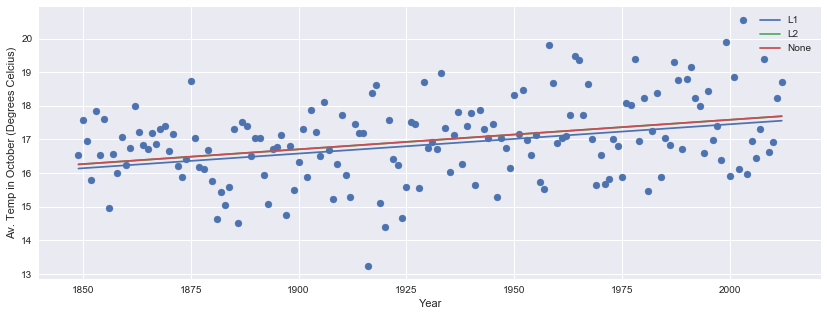

In [8]:
# Comparing best-fit line with dataset
f, ax = plt.subplots(figsize=(14, 5))
ax.set_xlabel('Year')
ax.set_ylabel('Av. Temp in October (Degrees Celcius)')
plt.plot(points[:,0], predict(b1, m1, points[:,0]), label='L1')
plt.plot(points[:,0], predict(b2, m2, points[:,0]), label='L2')
plt.plot(points[:,0], predict(b3, m3, points[:,0]), label='None')
plt.scatter(points[:,0], points[:,1])
plt.legend()
plt.show()

## Summary
In general L1 and L2 have differing properties:

![](http://www.chioka.in/wp-content/uploads/2013/12/L1-vs-L2-properties-regularization.png)

However, given that we are using only a single feature (the year) with a small dataset (164 examples), it is difficult to tell from this toy example the differences between L2 and L1 regularization.

In [9]:
# And just for fun, let's predict the impact of global warming by 2100
temp = predict(b1,m1, [2017, 2050, 2100])

In [10]:
temp

[17.599615767003478, 17.887561704869363, 18.323843428908578]